In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
le=LabelEncoder()
dt=DecisionTreeClassifier()

In [5]:
#data load
from google.colab import files
files.upload()

Saving wear_jacket_dataset.xlsx to wear_jacket_dataset.xlsx


{'wear_jacket_dataset.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\r\x9at[F\xc7MH\x95\x00\x00\x00\xcd\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\xcfM\x0b\xc20\x0c\x06\xe0\xbfRv\xb7\x99\x8a\x1e\xa4\x0eD=\x8a\x9e\xbc\xcf.u\x85\xb6)m\x84\xfa\xef\xed\x04?nyy\xc8\x1b\xa2.\x89"&\xb6\x98E\xf1.\xe4m32\xc7\r@\xd6#\xfa>\xcb\xca\xa1\x8a\xa1\xe4{\xae1\xdd\x81\x8c\xb1\x1a\x0f\xa4\x1f\x1e\x03\xc3\xa2m\xd7\x80\x851\x0c8\xcc\xe2\xb7\xb0\xe9\xd4.Fgu\xcf\x96Bw\xb2:Q&\xc3\xe2X4:\xb1\'\x1f\xab\xdc\x1c\n\x10\xe7z%>\x8b\x13K9\x97+\x05\xff\x8bS\xcb\x15S\x9e\xe6\xcao\xfcd\x05\xbf\x07\xba\x17PK\x03\x04\x14\x00\x00\x00\x08\x00\r\x9at[\xad\x02\x13\x08\xea\x00\x00\x00\xcb\x01\x00\x00\x11\x00\x00\x00docProps/core.xml\xa5\x91MO\xc30\x0c\x86\xff\xca\x94{\xeb\xa6\x15C\x8a\xba\\\x868\x81\x84\xc4$\x10\xb7(\xf1\xb6\x8a\xe6C\x89Q\xbb\x7fOZ\xb6\x0e\x047\x8e\xf1\xfb\xf8\xb1\xad\xb4:\x08\xed#>E\x1f0R\x87i5\xda\xde%\xa1\xc3\x86\x1d\x89\x82\x00H\xfa\x88V\xa52\x13.\x87{\x1f\xad\xa2\xfc\x8c\x07\x08J\xbf\xab\x03B]Uk\xb0H\xca(R0

In [6]:
df=pd.read_excel("wear_jacket_dataset.xlsx")

In [7]:
df.head()

,Outlook,Temperature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Sunny,Warm,Outdoor,No
2,Cloudy,Warm,Indoor,No
3,Sunny,Warm,Indoor,No
4,Cloudy,Cold,Indoor,Yes


In [8]:
x=df.drop(["Wear Jacket?"],axis=1)
y=df[["Wear Jacket?"]]

In [9]:
x

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Sunny,Warm,Outdoor
2,Cloudy,Warm,Indoor
3,Sunny,Warm,Indoor
4,Cloudy,Cold,Indoor
5,Cloudy,Cold,Outdoor
6,Sunny,Cold,Outdoor


In [10]:
for col in x.columns:
  x[col]=le.fit_transform(x[col])

In [11]:
x

,Outlook,Temperature,Routine
0,1,0,0
1,1,1,1
2,0,1,0
3,1,1,0
4,0,0,0
5,0,0,1
6,1,0,1


In [ ]:
#model implementation

In [12]:
model=dt.fit(x,y)

In [13]:
model.score(x,y)

1.0

In [14]:
#prediction
pred=model.predict(x)
pred

array(['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [15]:
#confuaion Metrixa
cm=confusion_matrix(y,pred)
cm

array([[4, 0],
       [0, 3]])

<Axes: >

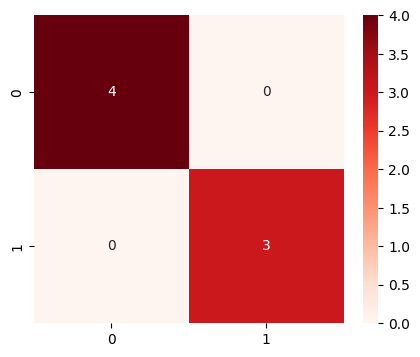

In [16]:

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [17]:
#classification report
class_report=classification_report(y,pred)
print(class_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [18]:
y_prob = model.predict_proba(x)[:, 1]

In [19]:
fpr, tpr, thresholds = roc_curve(y, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

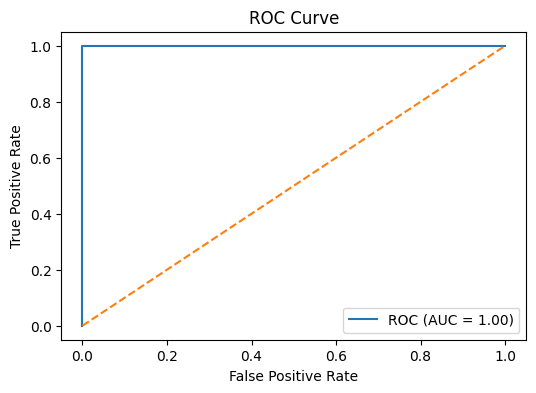

In [20]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC (AUC = %.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

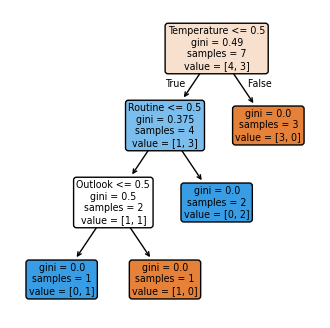

In [21]:

plt.figure(figsize=(4,4))
tree=plot_tree(model,feature_names=x.columns,filled=True,rounded=True)